In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Finding the best linear fit

Given a set of pairs $(x_1,y_1), \ldots, (x_n,y_n)$ the objective is to find $\beta_0,\beta_1\in\mathbb{R}$ which provide the linear model

$$
f(x) = \beta_0 + \beta_1 x
$$

which best explains the data.

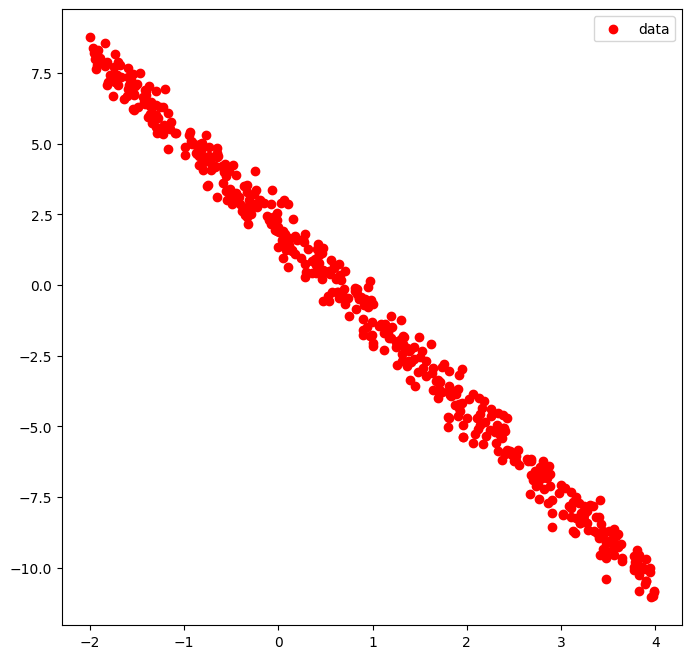

In [62]:
def linear_model(x, beta0, beta1):
    return beta0 + beta1 * x


# Generate some pairs (x_1,y_1),...,(x_n,y_n) and plot them
n = 500
beta0 = 2
beta1 = -np.pi
sigma = 1/2
x = uniform.rvs(loc=-2, scale=6, size=n)
err = norm.rvs(scale=sigma, size=n)
y = beta0 + beta1 * x + err

plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(x, y, label='data', color='red')
plt.legend()
plt.show()

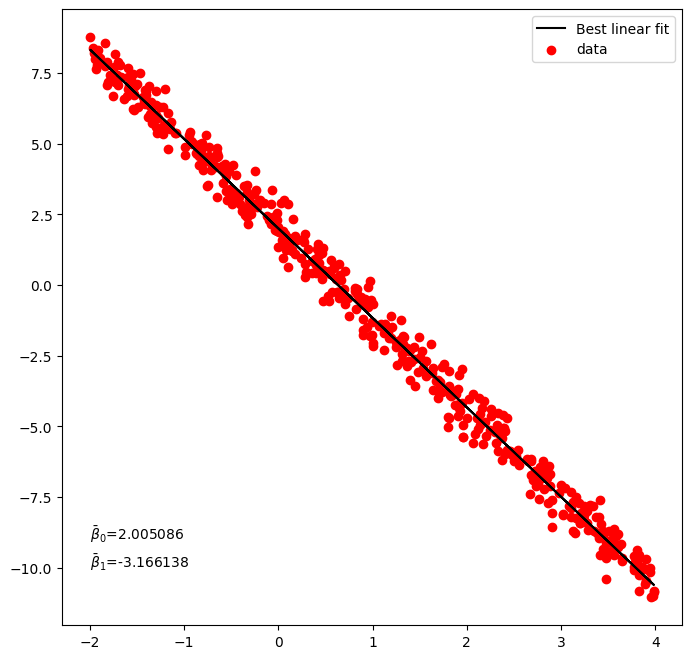

In [65]:
# Function computing the optimal beta1
def betahat1(x, y):
    ybar = np.mean(y)
    xbar = np.mean(x)
    numerator = np.sum((y - ybar) * (x - xbar))
    denominator = np.sum((x - xbar)**2)
    return numerator/denominator

# Function computing the optimal beta0 given beta1
def betahat0(x, y, betahat1):
    return np.mean(y) - betahat1 * np.mean(x)

# Compute optimal beta0 and beta1
bestbeta1 = betahat1(x, y)
bestbeta0 = betahat0(x, y, bestbeta1)

# Plot linear model against data
plt.plot(x, linear_model(x,bestbeta0, bestbeta1), color='black', label='Best linear fit')
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(x, y, label='data', color='red')

plt.text(-2, -9,r'$\bar{\beta}_0$'+'={:2f}'.format(bestbeta0))
plt.text(-2, -10,r'$\bar{\beta}_1$'+'={:2f}'.format(bestbeta1))
plt.legend()
plt.show()

# Compare with scipy.stats' built-in function

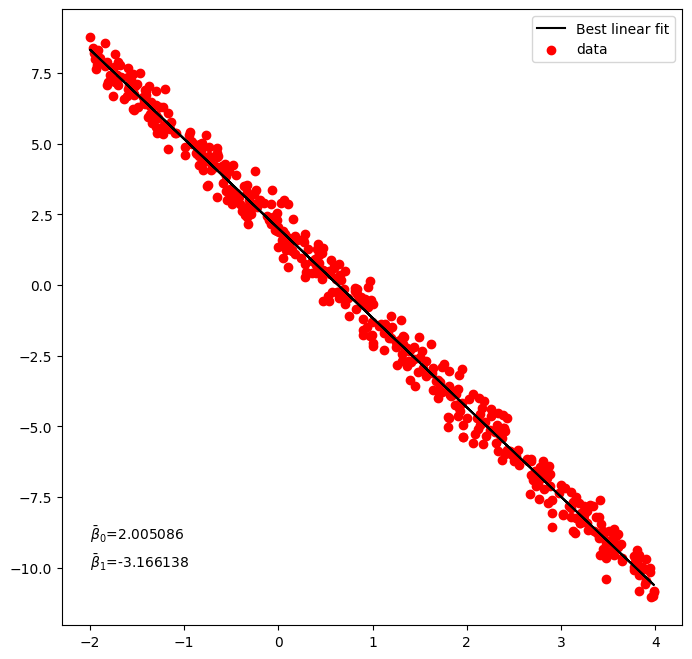

In [66]:
from scipy.stats import linregress

params = linregress(x, y)
# Plot scipy's linear model against data
plt.plot(x, linear_model(x,params[1], params[0]), color='black', label='Best linear fit')
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(x, y, label='data', color='red')
plt.text(-2, -9,r'$\bar{\beta}_0$'+'={:2f}'.format(params[1]))
plt.text(-2, -10,r'$\bar{\beta}_1$'+'={:2f}'.format(params[0]))
plt.legend()
plt.show()